In [1]:
#%%
import time
import json
import numpy as np
import pandas as pd
from pandas import json_normalize

import datetime

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

#Scatterplot and Correlation Matrix - Kaustubh
#Frequency Tables - Jonathan and Stephanie
#Naiyu - histograms

In [2]:
#%%
def load_df(csv_path, nrows = None):
    json_cols = ['device', 'geoNetwork', 'totals', 'trafficSource']
    df = pd.read_csv(csv_path,
                     #converters are dict of functions for converting values in certain columns. Keys can either be integers or column labels.
                     #json.loads() method can be used to parse a valid JSON string and convert it into a Python Dictionary.
                     #It is mainly used for deserializing native string, byte, or byte array which consists of JSON data into Python Dictionary.
                     converters = {col: json.loads for col in json_cols},                                                                         
                         dtype = {'fullVisitorId': 'str'}, # Important!!
                         nrows = nrows)
    for col in json_cols:
        # for each column, flatten data frame such that the values of a single col are spread in different cols
        # This will use subcol as names of flat_col.columns
        flat_col = json_normalize(df[col])
        # Name the columns in this flatten data frame as col.subcol for tracability
        flat_col.columns = [f"{col}.{subcol}" for subcol in flat_col.columns]
        # Drop the json_col and instead add the new flat_col
        df = df.drop(col, axis = 1).merge(flat_col, right_index = True, left_index = True)
    return df


csv_train_path = 'train.csv'
csv_test_path = 'test.csv'

train = load_df(csv_train_path, nrows = 100000)
# test = load_df(csv_test_path, nrows = 30000)
train.shape
# %%

(100000, 55)

# Histograms

In [3]:
train['totals.transactionRevenue'] = train['totals.transactionRevenue'].astype('float')

<AxesSubplot:xlabel='totals.transactionRevenue', ylabel='Count'>

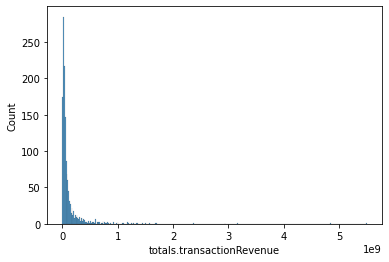

In [9]:
sns.histplot(data=train, x="totals.transactionRevenue")

Make a natural log transformation:

<AxesSubplot:xlabel='totals.transactionRevenue', ylabel='Count'>

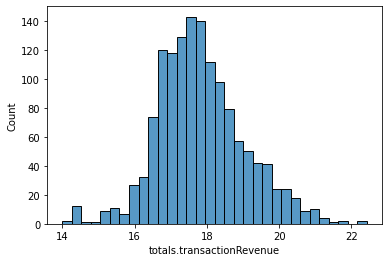

In [5]:
target = np.log(train['totals.transactionRevenue'])
sns.histplot(target)

After the natural log transformation, the distribution of the response variable looks alike a normal distribution. 

# Correlation Matrix

<AxesSubplot:>

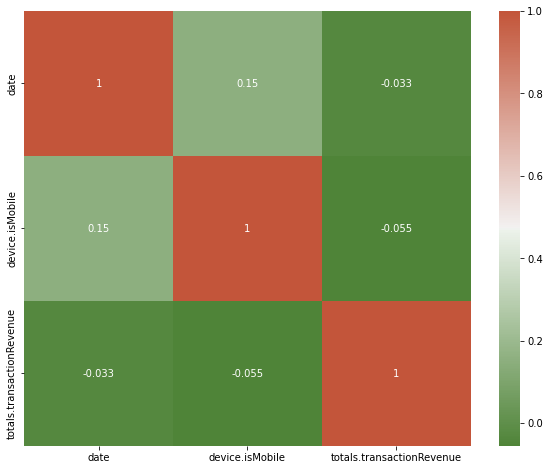

In [6]:
result = train.drop(columns=['totals.bounces', 'totals.newVisits', 'totals.visits', 'visitStartTime',
                             'visitId', 'visitNumber', 'trafficSource.adwordsClickInfo.page'])

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))

corr_matrix = result.corr()
# corr_matrix = corr_matrix.sort_values(by=['totals.transactionRevenue'], ascending= False) 
cmap_diverging = sns.diverging_palette(120, 20, as_cmap=True)

sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.index.values,
            cmap = cmap_diverging,
            annot = True)

# Frequency Tables

In [7]:
len(train["device.browserVersion"].unique())
train.date.dtype == 'int64'

cat_vars = []
for col in train.columns:
    if train[col].dtype == 'O':
        if len(train[col].value_counts()) > 1:
            cat_vars.append(col)


for i in cat_vars:
    print(pd.crosstab(index=train[i], columns='count') .sort_values("count", ascending = False))


col_0            count
channelGrouping       
Organic Search   42019
Social           24378
Direct           15814
Referral         12095
Paid Search       3022
Affiliates        1900
Display            768
(Other)              4
col_0                count
fullVisitorId             
1957458976293878100     44
0824839726118485274     26
3269834865385146569     23
3608475193341679870     21
4038076683036146727     19
...                    ...
3504260133191015550      1
3504190896738931466      1
3504105867871633072      1
3504095512782487176      1
9999799804624735268      1

[89213 rows x 1 columns]
col_0                           count
sessionId                            
0387871673225482446_1480492793      2
7817946123013268752_1480492790      2
946085548949296102_1480492063       2
7980925080669177483_1498285182      2
0996739878901151740_1497682650      2
...                               ...
3376391763828760484_1478837572      1
3376334945486588027_1481325414      1
3376183746916

In [8]:
from tabulate import tabulate

usuable_cat_vars = ["channelGrouping", "device.browser", "device.operatingSystem", "device.deviceCategory",
                    "geoNetwork.continent", "geoNetwork.subContinent", "geoNetwork.country", "totals.hits",
                    "totals.pageviews", "totals.transactionRevenue", "trafficSource.source", "trafficSource.medium",
                    "trafficSource.adContent"]

# for var in usuable_cat_vars:
#     print((pd.crosstab(index=train[var], columns='count') .sort_values("count", ascending = False)).to_markdown)


from IPython.core import display as ICD
for var in usuable_cat_vars:
    ICD.display((pd.crosstab(index=train[var], columns='count') .sort_values("count", ascending = False)))


pd.crosstab(index=train["channelGrouping"], columns='count') .sort_values("count", ascending = False)

train.to_csv('train_s.csv')

col_0,count
channelGrouping,
Organic Search,42019
Social,24378
Direct,15814
Referral,12095
Paid Search,3022
Affiliates,1900
Display,768
(Other),4


col_0,count
device.browser,
Chrome,68984
Safari,20467
Firefox,4004
Internet Explorer,2080
Edge,1063
Safari (in-app),743
Android Webview,715
Opera Mini,631
Opera,525


col_0,count
device.operatingSystem,
Windows,38001
Macintosh,29089
Android,13323
iOS,11718
Linux,4114
Chrome OS,3055
(not set),458
Windows Phone,153
BlackBerry,28


col_0,count
device.deviceCategory,
desktop,74135
mobile,22635
tablet,3230


col_0,count
geoNetwork.continent,
Americas,50435
Asia,24661
Europe,21601
Africa,1600
Oceania,1578
(not set),125


col_0,count
geoNetwork.subContinent,
Northern America,43874
Southeast Asia,9212
Western Europe,6481
Southern Asia,6331
Northern Europe,6172
Eastern Europe,5212
Eastern Asia,4815
South America,4549
Western Asia,4180


col_0,count
geoNetwork.country,
United States,40939
India,5499
United Kingdom,4092
Vietnam,3114
Canada,2930
...,...
Curaçao,1
Faroe Islands,1
Greenland,1


col_0,count
totals.hits,
1,48514
2,15989
3,7801
4,4676
5,3415
...,...
123,1
155,1
154,1


col_0,count
totals.pageviews,
1,49087
2,16708
3,8223
4,4987
5,3704
...,...
119,1
120,1
126,1


col_0,count
totals.transactionRevenue,
1.699000e+07,28
1.899000e+07,25
3.359000e+07,22
4.479000e+07,20
1.359000e+07,18
...,...
5.510000e+07,1
5.514000e+07,1
5.517000e+07,1


col_0,count
trafficSource.source,
google,44448
youtube.com,23060
(direct),15814
mall.googleplex.com,7895
Partners,1901
...,...
google.gatewaycdi.com,1
google.es,1
google.com.vn,1


col_0,count
trafficSource.medium,
organic,42019
referral,36473
(none),15814
cpc,3022
affiliate,1900
cpm,768
(not set),4


col_0,count
trafficSource.adContent,
Google Merchandise Collection,662
Google Online Store,148
Display Ad created 3/11/14,114
Full auto ad IMAGE ONLY,98
Display Ad created 3/11/15,56
Ad from 12/13/16,50
{KeyWord:Google Merchandise},28
Display Ad created 11/17/14,27
{KeyWord:Google Brand Items},27
